In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
# Data Collection for experiment
df = pd.read_csv("..\\Iris.csv")
# Display the first few rows of the dataset to inspect its structure and content.
print("First 5 rows of the dataset:-\n", df.head())

First 5 rows of the dataset:-
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# Check the dimensions of the dataset (number of rows and columns).
row, col = df.shape
print("No. of rows in the dataset: ", row)
print("No. of column in the dataset: ", col)

No. of rows in the dataset:  150
No. of column in the dataset:  5


In [4]:
# Identify the data types of each column (numeric, categorical, text, etc.).
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [5]:
# Display the number of missing values in each column
missingValues = df.isnull().sum()
print("Missing values per column:-")
print(missingValues)

Missing values per column:-
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
# Numerical Columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Categorical Columns
categorical_columns = df.select_dtypes(include='object').columns

In [7]:
# Finding Unique categories of species column
print("Types of Species: ", df['Species'].unique())

Types of Species:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
# Label Encoding
data_encoded_label = df.copy()
print("Categorical columns Before Label Encoding:-\n", data_encoded_label[categorical_columns].head())

Categorical columns Before Label Encoding:-
        Species
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa


In [9]:
# Fit the label encoder to the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    data_encoded_label[column] = label_encoder.fit_transform(data_encoded_label[column])

# Displays the first few rows of the encoded data
print("Categorical columns After Label Encoding:-\n", data_encoded_label[categorical_columns].tail())

Categorical columns After Label Encoding:-
      Species
145        2
146        2
147        2
148        2
149        2


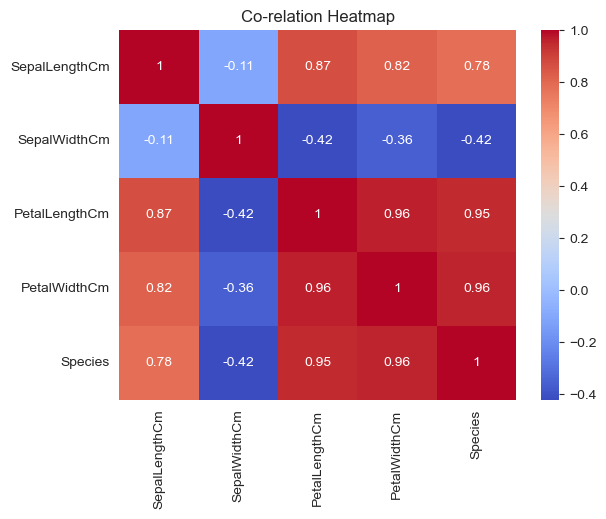

In [10]:
# Plotting the Co-relation between different features
sns.heatmap(data_encoded_label.corr(), annot=True, cmap='coolwarm')
plt.title("Co-relation Heatmap")
plt.show()

In [11]:
# Features and target variable
X = data_encoded_label.drop(columns=['Species'])  # Features
Y = data_encoded_label['Species']  # Target Variable

In [12]:
# Split the dataset into training and testing sets(80% training, 20%testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Display the size of the training and testing sets
print(f'Training set size: {X_train.shape[0]} samples \nTest set size: {X_test.shape[0]} samples')

Training set size: 120 samples 
Test set size: 30 samples


In [13]:
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(kernel='rbf')

In [14]:
# Train the model
svm_model.fit(X_train, y_train)
# Making Predictions
y_predict_rbf = svm_model.predict(X_test)

In [15]:
# Accuracy scores
acc_rbf = accuracy_score(y_test, y_predict_rbf)
# Print or visualize the accuracy scores
print(f'Accuracy RBF: {acc_rbf}')

Accuracy RBF: 1.0


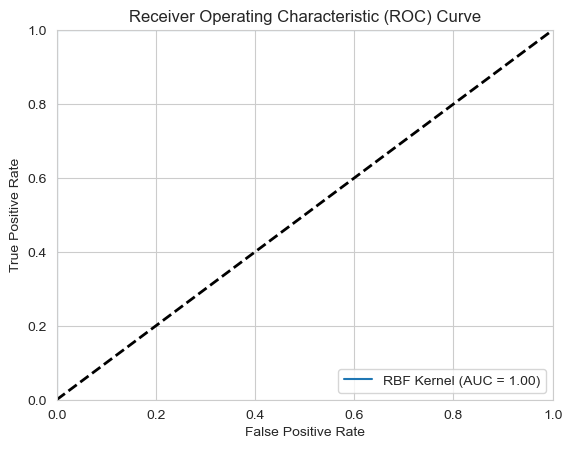

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Get decision function values for each model
y_score_rbf = svm_model.decision_function(X_test)
# Compute ROC curve and ROC area for each class
fpr_rbf, tpr_rbf, _ = roc_curve(y_test_bin.ravel(), y_score_rbf.ravel())
# Compute AUC for each class
auc_rbf = auc(fpr_rbf, tpr_rbf)

# Plot ROC curves
plt.plot(fpr_rbf, tpr_rbf, label=f'RBF Kernel (AUC = {auc_rbf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

AIM:-
Implement Principal Component Analysis Algorithm and use it to reduce dimension of iris dataset.
Consider the following instructions:
•	Plot the magnitude of eigen values in sorted order.
•	Plot the reconstructed data points along with the class labels using 1 and 2 PCs for reconstruction.
•	Classify the dimension reduced dataset using Bayes Classifier.


In [17]:
# Step 1: Calculate Covariance Matrix
cov_matrix = np.cov(X, rowvar=False)

In [18]:
# Step 2: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [19]:
# Step 3: Sort Eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

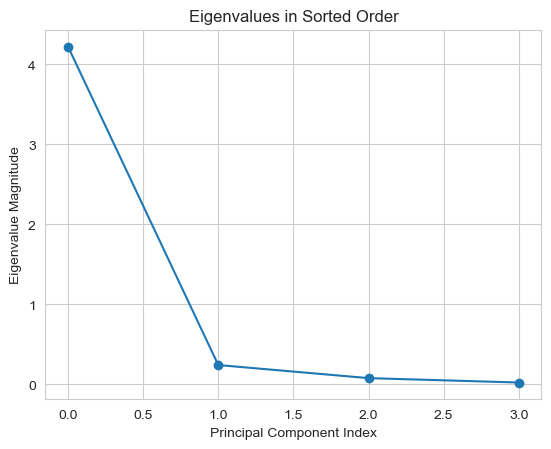

In [20]:
# Step 6: Plot Eigenvalues
plt.plot(eigenvalues, marker='o')
plt.title('Eigenvalues in Sorted Order')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue Magnitude')
plt.show()

In [21]:
# Step 4: Choose Principal Components (1 and 2 in this case)
selected_components = eigenvectors[:, :2]

In [22]:
from sklearn.decomposition import PCA

# Step 5: Project Data using PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [23]:
# Reconstruct the data using 1 and 2 PCs
X_reconstructed_1pc = np.dot(X_pca[:, :1], pca.components_[:1, :])
X_reconstructed_2pc = np.dot(X_pca, pca.components_)

In [24]:
from sklearn.naive_bayes import GaussianNB

# Step 8: Bayes Classifier
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [25]:
# Step 9: Classify Data
y_predict = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy of Bayes Classifier: {accuracy}')

Accuracy of Bayes Classifier: 0.8888888888888888


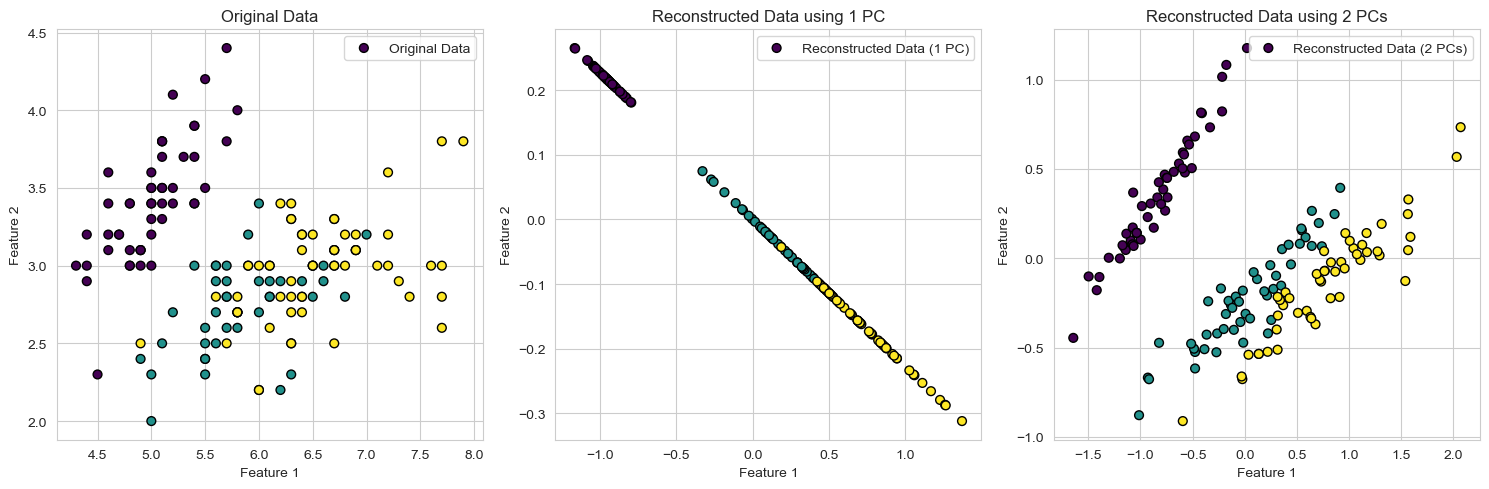

In [26]:
# Comparison Plot
plt.figure(figsize=(15, 5))

# Original Data
plt.subplot(1, 3, 1)
plt.scatter(X.values[:, 0], X.values[:, 1], c=Y, cmap='viridis', edgecolor='k', s=40, label='Original Data')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Reconstructed Data using 1 PC
plt.subplot(1, 3, 2)
plt.scatter(X_reconstructed_1pc[:, 0], X_reconstructed_1pc[:, 1], c=Y, cmap='viridis', edgecolor='k',
            s=40, label='Reconstructed Data (1 PC)')
plt.title('Reconstructed Data using 1 PC')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Reconstructed Data using 2 PCs
plt.subplot(1, 3, 3)
plt.scatter(X_reconstructed_2pc[:, 0], X_reconstructed_2pc[:, 1], c=Y, cmap='viridis', edgecolor='k',
            s=40, label='Reconstructed Data (2 PCs)')
plt.title('Reconstructed Data using 2 PCs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()